In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

1797 images


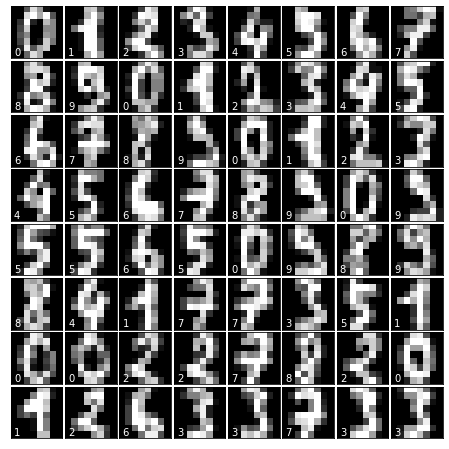

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                    hspace=0.05, wspace=0.05)
print(f"{len(digits.target)} images")

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.gray, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]), color='white')

439 / 450 = 97.6 %


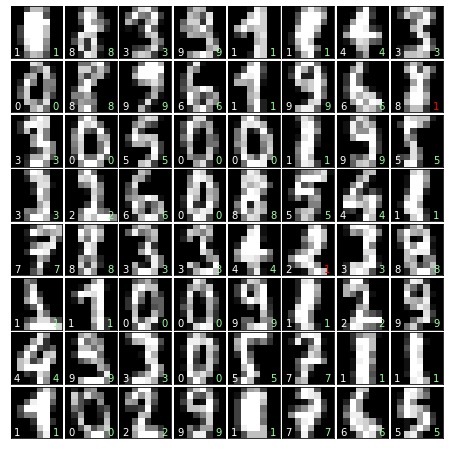

In [13]:
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

#split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

#train the model
k = 15 #try k=1,3,7,15,31
clf = neighbors.KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)

#use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

#Plot the prediction
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                   hspace=0.05, wspace=0.05)

#plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1,8,8)[i], cmap=plt.cm.gray,
             interpolation='nearest')
    #label the image with the target value
    ax.text(0, 7, str(expected[i]), color='white')
    if predicted[i] == expected[i]:
        ax.text(6, 7, str(predicted[i]), color='#a0ffa0')
    else:
        ax.text(6, 7, str(predicted[i]), color='red')

#the number of correct matches / total number of data points
matches = (predicted == expected)
print("%d / %d = %2.1f %%" %(matches.sum(), len(matches), 100*matches.sum()/float(len(matches))))

In [14]:
from sklearn import metrics
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      1.00      0.96        54
           2       1.00      0.95      0.98        42
           3       0.98      0.96      0.97        46
           4       1.00      0.98      0.99        46
           5       0.98      0.98      0.98        59
           6       0.98      1.00      0.99        40
           7       1.00      1.00      1.00        30
           8       0.94      0.92      0.93        50
           9       1.00      0.98      0.99        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [15]:
print(metrics.confusion_matrix(expected,predicted))
plt.show()

[[40  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  0  0  0  0  0]
 [ 0  1 40  0  0  0  0  0  1  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  0  0  0 45  0  0  0  1  0]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  4  0  0  0  0  0  0 46  0]
 [ 0  0  0  1  0  0  0  0  0 42]]
